In [1]:
import susie
import numpy as np
import pandas as pd
from susie.timing_data import TimingData
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt

In [2]:
url = 'all_lit_times_TrES-3b_deleted_BSU.csv'
# Read the CSV file directly from the URL
data = pd.read_csv(url)
# tra_or_occs = np.array(data["tra_or_occ"])#change names to columns needed
epochs = np.array(data["Epoch"].astype('int'))
mid_times = np.array(data["Midtime"])
mid_time_errs = np.array(data["Midtime_err_minus_days"])

In [3]:
# Create new transit times object with above data
timing_obj1 = TimingData('jd', epochs, mid_times, mid_time_uncertainties=mid_time_errs, tra_or_occ=None, time_scale='tdb')
ephemeris_obj1 = Ephemeris(timing_obj1)

In [4]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')
for key, value in linear_model_data.items():
    print(f"{key}: {value}\n")

period: 1.3061861753262145

period_err: 7.544691349556249e-08

conjunction_time: 2454185.9118495113

conjunction_time_err: 0.0002049786903126695

model_type: linear

model_data: [2454185.91184951 2454198.97371126 2454214.64794537 2454215.95413154
 2454239.4654827  2454256.44590298 2454337.42944585 2454354.40986613
 2454388.37070669 2454504.62127629 2454521.60169657 2454532.05118597
 2454533.35737215 2454534.66355832 2454535.9697445  2454537.27593067
 2454538.58211685 2454539.88830302 2454541.1944892  2454542.50067538
 2454551.6439786  2454552.95016478 2454569.93058506 2454589.52337769
 2454589.52337769 2454593.44193621 2454594.74812239 2454598.66668091
 2454611.72854267 2454615.64710119 2454615.64710119 2454619.56565972
 2454627.40277677 2454632.62752147 2454640.46463852 2454640.46463852
 2454641.7708247  2454648.30175558 2454649.60794175 2454650.91412793
 2454650.91412793 2454653.52650028 2454653.52650028 2454657.4450588
 2454662.66980351 2454670.50692056 2454674.42547908 2454683.5687

In [5]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')
for key, value in quadratic_model_data.items():
    print(f"{key}: {value}\n")

period: 1.3061891103013408

period_err: 1.8358507458480893e-07

conjunction_time: 2454185.909413997

conjunction_time_err: 0.0002092322888932705

period_change_by_epoch: -1.4349496718232844e-09

period_change_by_epoch_err: 8.542105426804604e-11

model_type: quadratic

model_data: [2454185.909414   2454198.97130503 2454214.64557408 2454215.95176315
 2454239.46316631 2454256.44362386 2454337.42734114 2454354.40779729
 2454388.36870886 2454504.6195142  2454521.59996796 2454532.04947784
 2454533.35566657 2454534.6618553  2454535.96804403 2454537.27423275
 2454538.58042147 2454539.8866102  2454541.19279892 2454542.49898764
 2454551.64230863 2454552.94849734 2454569.92895041 2454589.52178057
 2454589.52178057 2454593.44034657 2454594.74653523 2454598.66510121
 2454611.72698771 2454615.64555363 2454615.64555363 2454619.56411953
 2454627.40125131 2454632.6260058  2454640.46313749 2454640.46313749
 2454641.7693261  2454648.30026913 2454649.60645773 2454650.91264633
 2454650.91264633 2454653.525

In [6]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 12973.658152375163
Quadratic Model BIC: 7022.988575753158


In [7]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"\u0394 BIC: {delta_bic_value}")

Δ BIC: 5950.669576622005


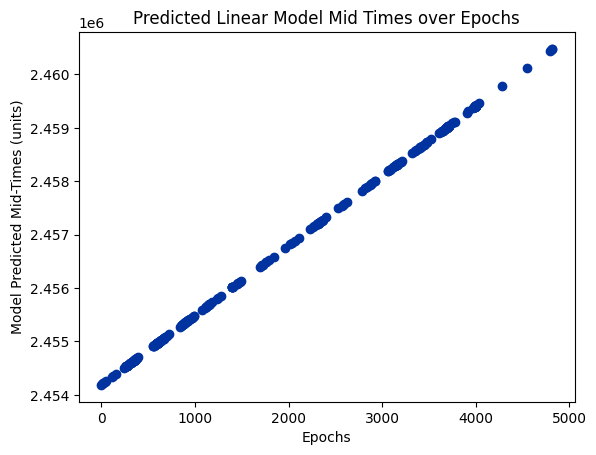

In [8]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

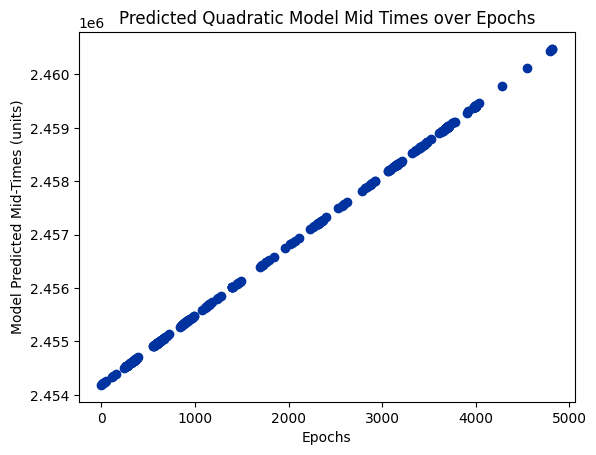

In [9]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

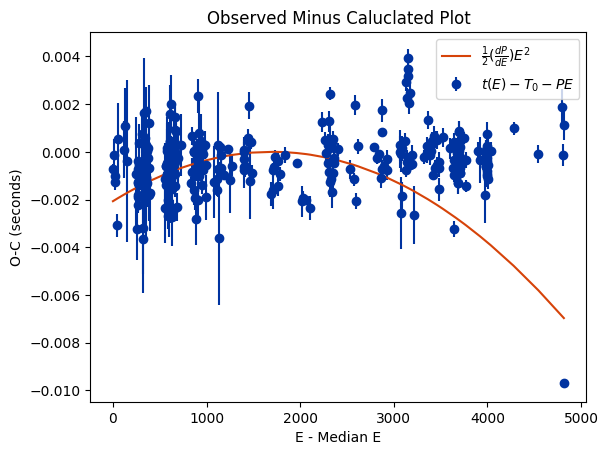

In [10]:
ephemeris_obj1.plot_oc_plot()

In [11]:
DAYS_TO_SECONDS = 86400
# y = T0 - PE - 0.5 dP/dE E^2
lin_model = ephemeris_obj1.get_model_ephemeris('linear')
quad_model = ephemeris_obj1.get_model_ephemeris('quadratic')
# y = 0.5 dP/dE * (E - median E)^2
# TODO: Make this calculation a separate function
quad_model_curve = (0.5*quad_model['period_change_by_epoch'])*((ephemeris_obj1.timing_data.epochs - np.median(ephemeris_obj1.timing_data.epochs))**2) * DAYS_TO_SECONDS
# plot points w/ x=epoch, y=T(E)-T0-PE, yerr=sigmaT0
# y = self._subtract_plotting_parameters(self.timing_data.mid_times, lin_model['conjunction_time'], lin_model['period'], self.timing_data.epochs)
y = (ephemeris_obj1._subtract_plotting_parameters(ephemeris_obj1.timing_data.mid_times, lin_model['conjunction_time'], lin_model['period'], ephemeris_obj1.timing_data.epochs)) * DAYS_TO_SECONDS

In [12]:
i = 0
while i in range(len(y)):
    # if epochs[i] > 3000 and epochs[i] < 4000:
    if y[i] < -0.010:
        print(i)
        print(epochs[i], y[i])
    i+=1

0
0 -63.89375925064087
1
10 -10.477254257779123
2
22 -85.9998412187565
3
23 -108.13336657699892
4
41 -266.3452471411574
8
155 -31.68175491373404
9
244 -80.8955433738447
10
257 -281.36767415417125
11
265 -155.17206227032148
12
266 -191.9935787711438
13
267 -33.55113729467121
14
268 -61.73270870567649
15
269 -112.37825000298471
16
270 -74.03179763459775
17
271 -109.98934778963303
18
272 -162.3629022447858
19
273 -118.83245063600043
21
281 -47.068810664677585
22
294 -66.10092779792467
23
309 -98.29618067215051
24
309 -55.09617359111871
26
313 -112.52636004919623
27
316 -314.5750034154844
28
326 -276.71049614673393
29
329 -76.99913803735399
31
332 -105.38378673863917
33
342 -53.69525466849154
34
348 -8.512540187803097
36
349 -93.71810324319085
37
354 -156.8658509879242
38
355 -70.99939887702931
39
356 -119.91692701649299
42
358 -91.60802860114927
43
361 -113.94467148311378
46
374 -23.248797989072045
47
381 -57.22364074445068
48
384 -155.59229930768197
50
397 -148.70442023893702
51
554 -202